## Building Models for the Titanic Set
### Model 1: K Nearest Neighbors 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

In [3]:
# Importing the data from the preprocessing stage
train_df = pd.read_csv('train_for_models.csv')
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [4]:
# Splitting the target from the features
target = train_df['Survived']
features = train_df.drop('Survived', axis=1)

In [6]:
# One-hot encoding
features = pd.get_dummies(features)
features.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [7]:
# Splitting the train and test set to train the model
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [8]:
# Normalizing the StandardScaler
scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

scaled_df_train = pd.DataFrame(scaled_data_train, columns=features.columns)
scaled_df_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.575735,-1.620517,0.017145,-0.467660,-0.468878,-0.032568,-0.722247,0.722247,-0.460805,-0.308354,0.595793
1,1.696946,0.809349,-0.344320,-0.467660,-0.468878,-0.487331,-0.722247,0.722247,-0.460805,-0.308354,0.595793
2,-0.773529,-0.405584,-0.421242,-0.467660,2.046870,-0.342854,1.384569,-1.384569,-0.460805,-0.308354,0.595793
3,0.122358,0.809349,-0.575085,-0.467660,-0.468878,-0.478201,-0.722247,0.722247,-0.460805,-0.308354,0.595793
4,-0.548587,-1.620517,-2.196596,0.376656,2.046870,2.314937,-0.722247,0.722247,-0.460805,-0.308354,0.595793


In [9]:
# Fit a KNN model
clf = KNeighborsClassifier()

clf.fit(scaled_data_train, y_train)

test_preds = clf.predict(scaled_data_test)

In [10]:
# Evaluate the model
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       134
           1       0.77      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



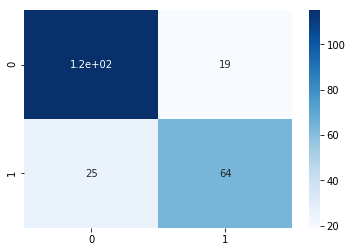

In [11]:
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, cmap='Blues')

In [12]:
# Changing the weights to be distance
clf_2 = KNeighborsClassifier(weights='distance')
clf_2.fit(scaled_data_train, y_train)
test_preds2 = clf_2.predict(scaled_data_test)

In [13]:
print(classification_report(y_test, test_preds2))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       134
           1       0.77      0.74      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



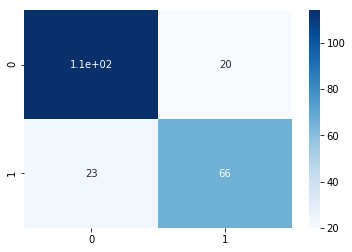

In [14]:
sns.heatmap(confusion_matrix(y_test, test_preds2), annot=True, cmap='Blues')

In [15]:
# Changing the leaf size to 40
clf_3 = KNeighborsClassifier(weights='distance', leaf_size=40)
clf_3.fit(scaled_data_train, y_train)
test_preds3 = clf_3.predict(scaled_data_test)

In [16]:
print(classification_report(y_test, test_preds3))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       134
           1       0.77      0.74      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



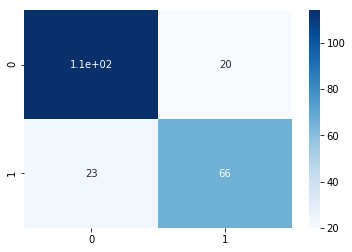

In [17]:
sns.heatmap(confusion_matrix(y_test, test_preds3), annot=True, cmap='Blues')

In [18]:
# Checking all the parameters 
clf_4 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=3, p=2, weights='uniform')
clf_4.fit(scaled_data_train, y_train)
test_preds4 = clf_4.predict(scaled_data_test)

In [19]:
print(classification_report(y_test, test_preds4))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       134
           1       0.73      0.76      0.75        89

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.79      0.79       223



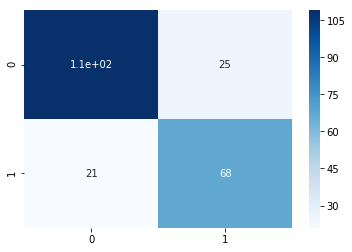

In [20]:
sns.heatmap(confusion_matrix(y_test, test_preds4), annot=True, cmap='Blues')